## Customer Segmentation (with PCA) 

### Project Overview
* In this project we will start using PCA for dimensionality reduction and then perform customer segmentation with different clustering algorithms.  

### Code and Resources Used 
**Python Version:** 3.7  
**Packages:** pandas, numpy, matplotlib, seaborn, sklearn.

### Dataset
The dataset is from: https://thecleverprogrammer.com/2021/02/08/customer-personality-analysis-with-python/#google_vignette


### Notebook content:

1. Exploratory Data Analysis
2. Data Preparation
3. PCA
4. K-mean algorithm 
5. DBSCAN altorithm 
6. Conclusion

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('dataset/marketing_campaign.csv', sep="\t")

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The only variable with missing values is Income with just 24.

In [17]:
data.duplicated().sum()

0

In [18]:
data['Income']=data['Income'].fillna(data['Income'].median())

In [19]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
# data['Dt_Customer'] = pd.to_datetime(dataLake.day, dayfirst=True) # to set the dayfirst param to true
# data['Dt_Customer'] = pd.to_datetime(dataLake.day, format="%d/%m/%y") # set a format 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3404\3270077037.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])


In [22]:
data['Dt_Customer'].head()

0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

    Variables description:
    
    • Customer data:
    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise
    
    • Purchases data:
    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years
    
    • Promotion data:
    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
    
    • Purchase channel data:
    NumWebPurchases: Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month

### Find numerical variables (continuous, discrete, target)

In [27]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables:'.format(len(numerical)))
numerical

There are 25 numerical variables:


['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Age',
 'Total_Expenses',
 'Children']

### Find discrete variables

We will select the ones that contain a finite and small number of distinct values from all the numerical ones:

In [21]:
discrete = []

for var in numerical:
    if len(data[var].unique()) < 10:
        print(var, 'values: ', data[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

Kidhome values:  [0 1 2]
Teenhome values:  [0 1 2]
AcceptedCmp3 values:  [0 1]
AcceptedCmp4 values:  [0 1]
AcceptedCmp5 values:  [0 1]
AcceptedCmp1 values:  [0 1]
AcceptedCmp2 values:  [0 1]
Complain values:  [0 1]
Z_CostContact values:  [3]
Z_Revenue values:  [11]
Response values:  [1 0]

There are 11 discrete variables


### Continuous variables

In [22]:
continuous = [var for var in numerical if var not in discrete and var not in ['price']]

print('There are {} numerical and continuous variables'.format(len(continuous)))
continuous

There are 16 numerical and continuous variables


['ID',
 'Year_Birth',
 'Income',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

### Find categorical variables 

In [23]:
categorical = [var for var in data.columns if data[var].dtype=='O']  

print('There are {} categorical variables:'.format(len(categorical)))
categorical

There are 2 categorical variables:


['Education', 'Marital_Status']

Categorical variables inspection:

In [24]:
pd.set_option('display.max_colwidth', 0)
data[categorical].agg(['unique']).transpose()

,unique
Education,"[Graduation, PhD, Master, Basic, 2n Cycle]"
Marital_Status,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"


---

## A

### Continuous Variables distributions

In [32]:
fts = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

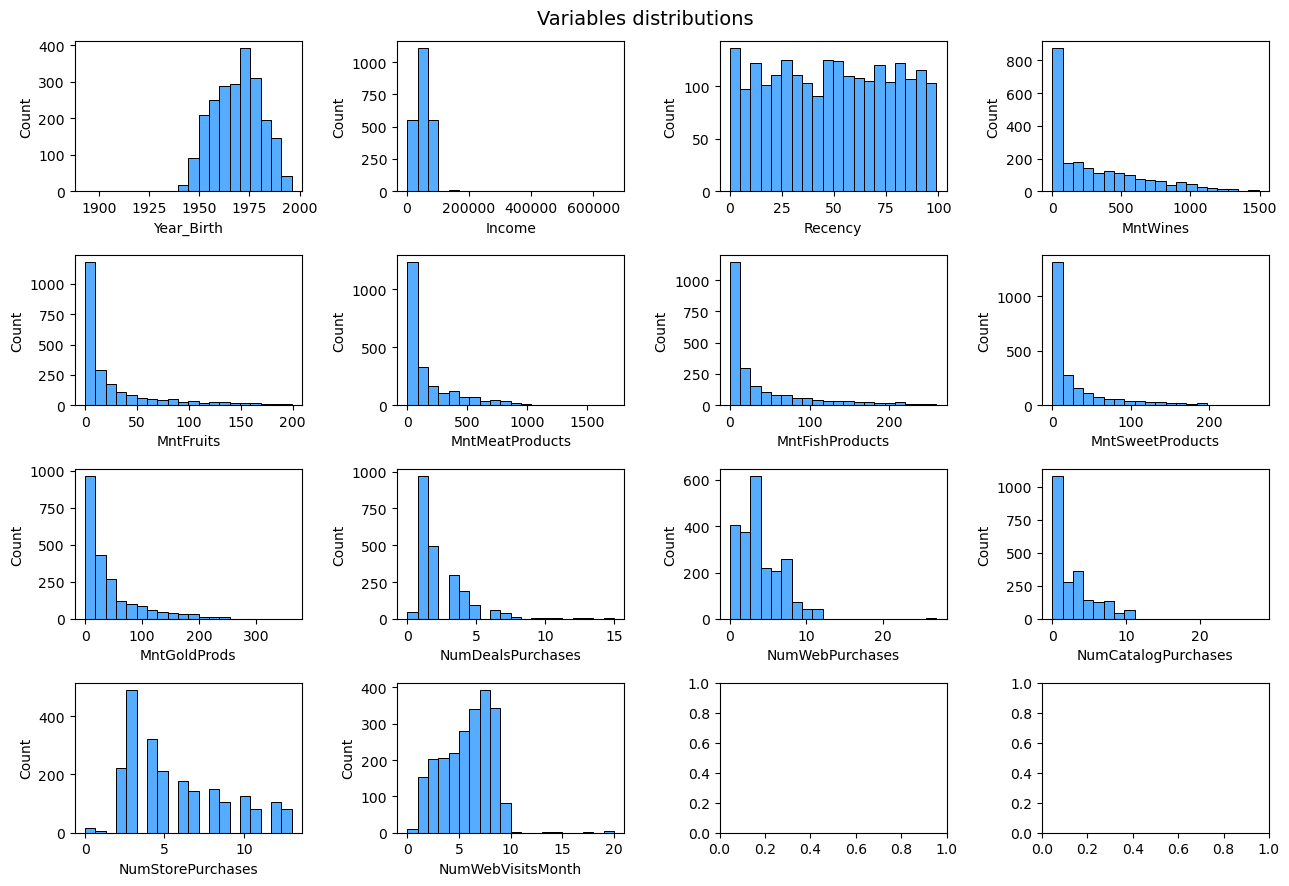

In [36]:
fig = plt.subplots(nrows=4,ncols=4,figsize = (11,7))

for i in range(len(fts)):
    plt.subplot(4,4,i+1)
    ax = sns.histplot(data[fts[i]], color='dodgerblue', bins=20)

plt.suptitle('Variables distributions', fontsize=14)
plt.tight_layout()

----

## B

In [25]:
data['Age'] = 2024-data["Year_Birth"]
data["Total_Expenses"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data['Home_Share']=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data['Children']=data["Kidhome"]+data["Teenhome"]
# data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
# data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]
# data["Is_Parent"] = np.where(data.Children> 0, 1, 0)
data['Education_Level']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})
# data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

Finally we'll drop features we don't need

In [26]:
data = data.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

In [14]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Expenses,Home_Share,Children,Education_Level
0,Graduation,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,1,67,1617,Alone,0,Graduate
1,Graduation,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,70,27,Alone,2,Graduate
2,Graduation,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,59,776,Partner,0,Graduate
3,Graduation,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,40,53,Partner,1,Graduate
4,PhD,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,43,422,Partner,1,Postgraduate


In [27]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables:'.format(len(numerical)))
numerical

There are 25 numerical variables:


['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Age',
 'Total_Expenses',
 'Children']

In [28]:
continuous = [var for var in numerical if var not in discrete]

print('There are {} numerical and continuous variables'.format(len(continuous)))
continuous

There are 16 numerical and continuous variables


['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Age',
 'Total_Expenses',
 'Children']

In [29]:
fts = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total_Expenses', 'Children']

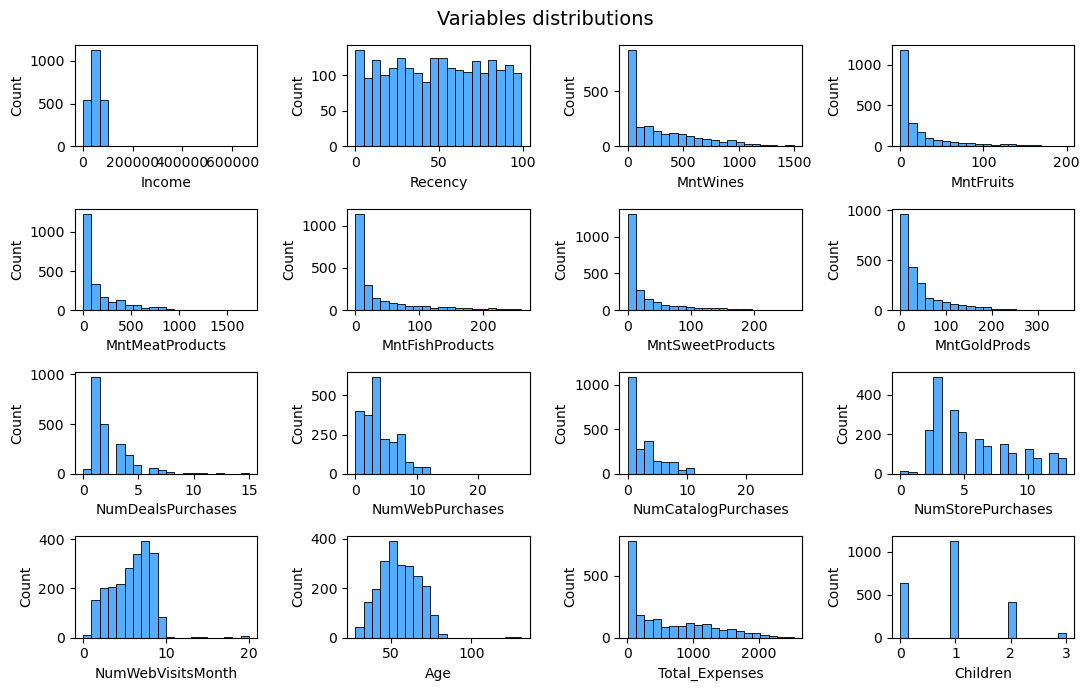

In [34]:
fig = plt.subplots(nrows=4,ncols=4,figsize = (11,7))

for i in range(len(fts)):
    plt.subplot(4,4,i+1)
    ax = sns.histplot(data[fts[i]], color='dodgerblue', bins=20)

plt.suptitle('Variables distributions', fontsize=14)
plt.tight_layout()

----

## Outliers Filtering

In [31]:
def plot_boxplot_and_hist(data, variable):

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)})
    
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)
    
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

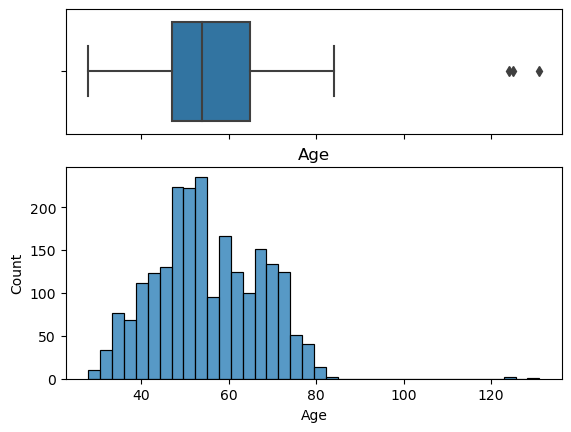

In [32]:
plot_boxplot_and_hist(data, "Age") # before trimming

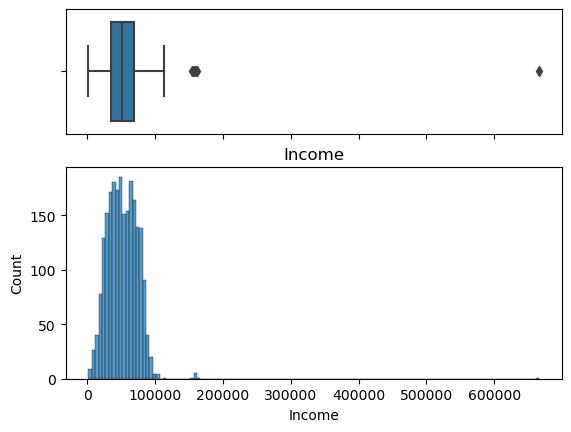

In [33]:
plot_boxplot_and_hist(data, "Income") # before trimming

In [112]:
trimmer = OutlierTrimmer(variables=["Age", "Credit amount", "Duration"], 
                         capping_method="iqr",
                         tail="both",
                         fold=1.5,
                         )

In [113]:
trimmer.fit(X_train_)

OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both',
               variables=['Age', 'Credit amount', 'Duration'])

In [116]:
print(X_train_.shape, X_test_.shape)
print(y_train.shape, y_test.shape)

X_train__ = trimmer.transform(X_train_)
X_test__ = trimmer.transform(X_test_)

print(X_train__.shape, X_test__.shape)
print(X_train__['Risk'].shape, X_test__['Risk'].shape) #-> this will be our y_train and y_test when we divide targets again

(700, 10) (300, 10)
(700,) (300,)
(604, 10) (247, 10)
(604,) (247,)


We will check how our trimmer worked visualizing the variables distributions:

## Scale (IB2/3)

## PCA (idem)